In [1]:
# Introduction 
# Decision trees leave you with a difficult decision.
# A deep tree with lots of leaves will overfit because 
# each prediction is coming from historical data from 
# only the few houses at its leaf. But a shallow tree with 
# few leaves will perform poorly because it fails to capture
# as many distinctions in the raw data

# Even today's most sophisticated modeling techniques face 
# this tension between underfitting and overfitting. But, 
# many models have clever ideas that can lead to better
# performance. We'll look at the random forest as an example.

# The random forest uses many trees, and it makes a prediction
# by averaging the predictions of each component tree. It 
# generally has much better predictive accuracy than a 
# single decision tree and it works well with default parameters.
# If you keep modeling, you can learn more models with even
# better performance, but many of those are sensitive to 
# getting the right parameters. 

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load data
melbourne_file_path = '../input/melbourne-housing-snapshot/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)

In [6]:
# Filter rows with missing values
melbourne_data = melbourne_data.dropna(axis=0)

# Choose target and features
y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]

In [7]:
# split data into training and validation data, for both 
# features and target
# The split is based on a random number generator. Supplying
# a numeric value to the random_state argument guarantees
# we get the same split every time we run this script
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

In [9]:
# Check DecisionTreeRegressor method
nodes = []
maes = []

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

for max_leaf_nodes in range(5,1000,25):
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    nodes.append(max_leaf_nodes)
    maes.append(my_mae)

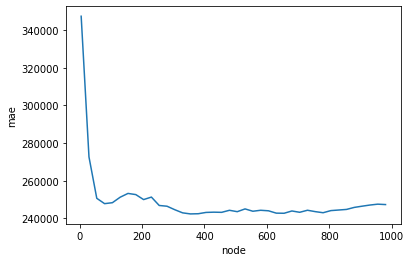

In [11]:
import matplotlib.pyplot as plt

plt.xlabel("node")
plt.ylabel("mae")
plt.plot(nodes, maes)
plt.show()

In [12]:
# Try random forest model
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))


191669.7536453626


In [13]:
# Conclusion
# There is likely for further improvement, but this is a big 
# improvement over the best decision tree error of 250,000.
# There are parameters which allow you to change the performance
# of the Random Forest much as we changed the maximum depth 
# of the single decision tree. But one of the best features
# of Random Forest models is that they generally work reasonably
# even without this tunning.